<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/3_4_2_%EB%B9%84%EC%9D%8C%EC%88%98_%ED%96%89%EB%A0%AC_%EB%B6%84%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs

from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer


import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(12,8)})

from pandas.core.common import random_state

# 3.4.2 비음수 행렬 분해

특성뽑아낸다. 비지도 알고리즘, 차원축소에도 사용, 가중치 합으로 각 데이터 포인트 나타냄. PCA와 다르게 NMF는 분산이 적고, 음수가 아닌 성분과 계수값을 찾는다. 즉 주성분과 계수가 모두 0보다 크거나 같아야 한다.

\
주로 오디오 트랙과 같이 여러 악기로 이루어진 음악 데이터에 이용한다.

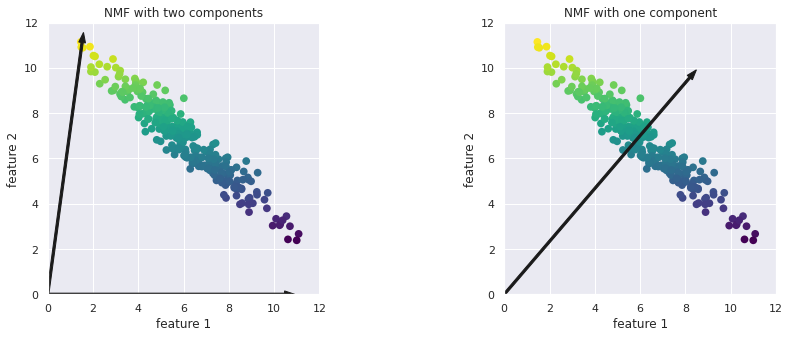

In [11]:
mglearn.plots.plot_nmf_illustration()

NMF를 다루려면 주어진 데이터가 양수인지 확인해야 한다. 다른 말로 원점에서 데이터가 어디에 놓여있는지 알아야 된다는 의미. 
**그림** 왼쪽은 성분이 2개 오른쪽은 성분이 1개 일때이다. 하나의 성분만 사용한다면 평균으로 향하는 성분을 만들고, 많다면 각 특성 끝에 위치한 포인트를 가르킨다. 
PCA와 다르게 주성분은 없다. 모든 성분을 동등하게 취급한다. NMF는 무작위로 초기화하기 때문에 난수 생성 초깃값에 따라 결과가 달라진다.

\
### 얼굴 이미지에 NMF 적용하기

LFW 데이터셋에 NMF를 적용하기
NMF 를 사용해 데이터를 재구성하는 데 성분의 개수가 어떤 영향을 주는지 살펴본다.

In [12]:
from IPython.core.pylabtools import figsize
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255  ## 맞나??
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)


________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.117647, ..., 0.613072]], dtype=float32))
______________________________________________________nmf_faces - 588.8s, 9.8min


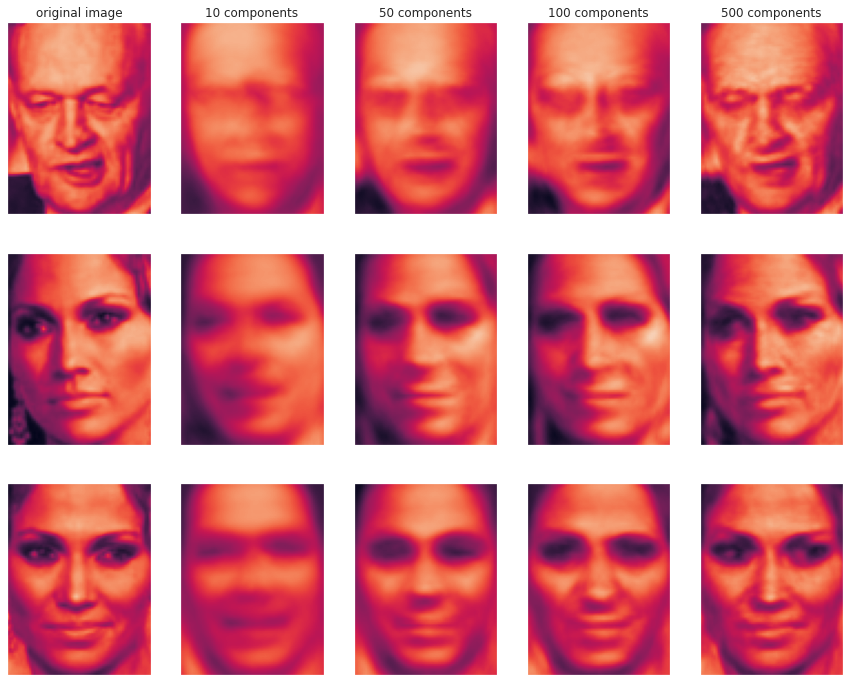

In [8]:
mglearn.plots.plot_nmf_faces(X_train, X_test[:3], image_shape)